In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
LABELS=["sit on bed", " sit on chair", "lying", "ambulating"]
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [32]:
# Import the dataset which we clean and preprocessed.

In [33]:
df = pd.read_csv('real_data.csv')

In [34]:
x,y = df.iloc[:, :-1], df.iloc[:, -1]

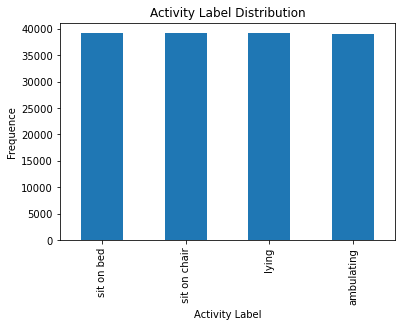

In [9]:
count_class = pd.value_counts(y, sort=True)
count_class.plot(kind=  'bar')
plt.title("Activity Label Distribution")
plt.xticks(range(4),LABELS)
plt.xlabel('Activity Label')
plt.ylabel('Frequence')
plt.show()

In [12]:
# There is no any outliers.

In [35]:
x_train ,x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.25, random_state = 1234)

In [15]:
dec_clf = DecisionTreeClassifier()

In [16]:
dec_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
dec_clf.score(x_train, y_train)

0.994357062608518

In [18]:
# It is giving 99% accuracy on test data.

In [19]:
dec_clf.score(x_test ,y_test)

0.9909866203656419

In [20]:
# this model is giving 99% accuray . Then there is no need of hyperparameter tunnings.

In [23]:
import pickle
pickle.dump(dec_clf, open('dec_wih.pkl', 'wb'))

In [30]:
import pickle
dec_clf = pickle.load(open('dec_wih.pkl','rb'))
svc_clf = pickle.load(open('svc_wiht.pkl','rb'))


In [36]:
y_dec_clf = dec_clf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_dec_clf)

0.9909866203656419

In [38]:
y_dec_clf

array([4, 3, 4, ..., 2, 4, 3], dtype=int64)

In [48]:
x_test.iloc[12].values

array([ 3.0080e+02,  9.5210e-01,  3.0775e-01, -3.6490e-02,  1.0000e+00,
       -5.7500e+01,  4.4577e+00,  9.2325e+02])

In [67]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x_train)
dec_clf.predict([x_test.loc[142570].values])

array([4], dtype=int64)

In [69]:
svc_clf.predict([x_test.loc[142570].values])

array([4], dtype=int64)

In [60]:
x_test.shape, 

((39164, 8),)

In [55]:
x_test.head(5)

,Time,Acc. Front,Acc. vert,Acc. Lat,id,RSSI,Phase,Freq
142570,298.25,0.94038,0.296270,-0.036490,2,-57.5,4.4117,923.25
54038,716.33,1.28040,0.996740,0.180170,3,-49.0,6.1068,925.75
5832,146.25,0.37756,0.020670,-0.150520,1,-61.0,1.2931,921.25
137180,353.85,1.05760,0.514450,-0.002281,1,-56.5,5.0713,923.75
147090,187.50,0.45964,0.078086,-0.116310,4,-59.5,1.7395,921.75


In [56]:
y_test.head(5)

142570    4
54038     3
5832      4
137180    4
147090    4
Name: Activity Label, dtype: int64

In [63]:
y_test.loc[5832]

4

In [65]:
x_test.loc[142570].values

array([ 2.9825e+02,  9.4038e-01,  2.9627e-01, -3.6490e-02,  2.0000e+00,
       -5.7500e+01,  4.4117e+00,  9.2325e+02])

#  KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train ,y_train)

KNeighborsClassifier()

In [26]:
knn.score(x_train ,y_train)

0.9854373063697954

In [27]:
knn.score(x_test ,y_test)

0.9817434378510878

In [28]:
# Again it is giving 98% accuracy so no  need to model hyperparameters tunning.

In [29]:
pickle.dump(knn, open('knn_wih.pkl', 'wb'))